In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('../data/output.csv')

In [24]:
sales_data = data[data['category']=='total_net_sales']
sales_data['value'] = sales_data['value'].astype(float)

/var/folders/3_/9l8k0s297fvfm4ymcnc68wkh0000gq/T/ipykernel_70247/3838144427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['value'] = sales_data['value'].astype(float)


Text(0.5, 1.0, 'Tulia Sales Data')

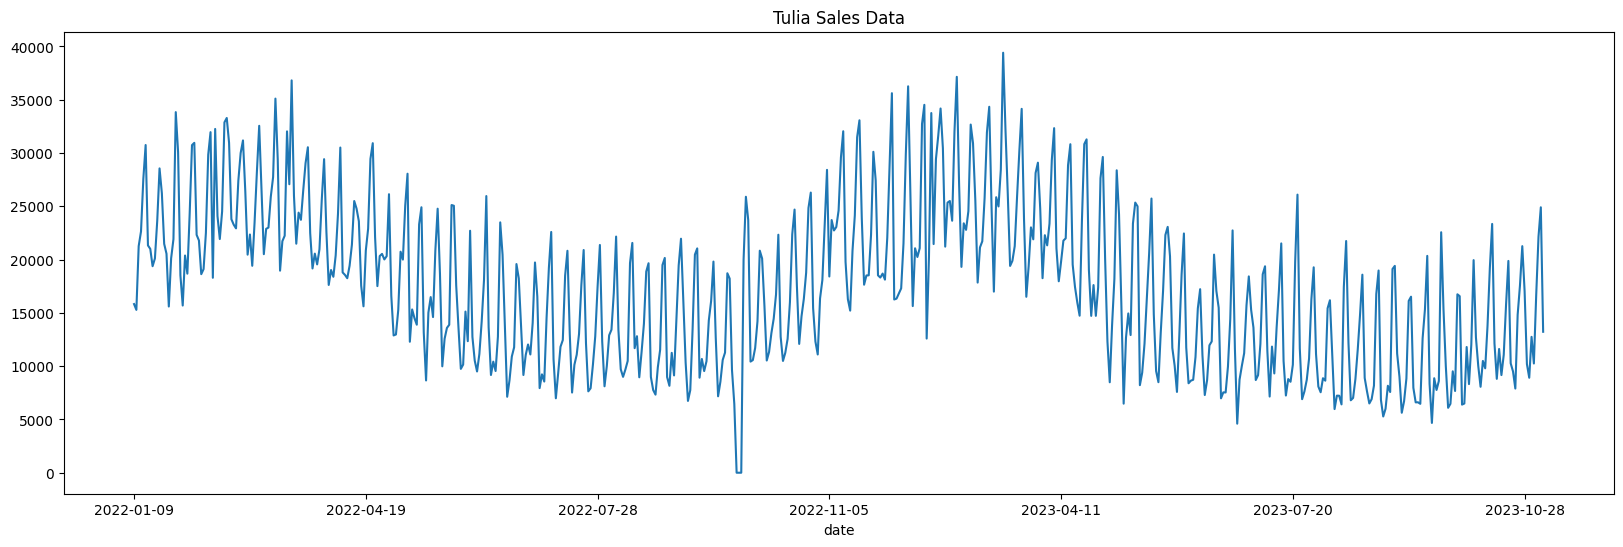

In [29]:
sales_data.sort_values('date',ascending=True).set_index('date')['value'].plot(figsize=(20,6))
plt.title('Tulia Sales Data')

AttributeError: 'Series' object has no attribute 'weekday'

In [44]:
from datetime import timedelta 

sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data['week'] = sales_data['date'] - pd.to_timedelta(sales_data['date'].dt.dayofweek, unit='d')

/var/folders/3_/9l8k0s297fvfm4ymcnc68wkh0000gq/T/ipykernel_70247/1987234967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['date'] = pd.to_datetime(sales_data['date'])
/var/folders/3_/9l8k0s297fvfm4ymcnc68wkh0000gq/T/ipykernel_70247/1987234967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['week'] = sales_data['date'] - pd.to_timedelta(sales_data['date'].dt.dayofweek, unit='d')


In [46]:
sales_data['week_total'] = sales_data.groupby('week')['value'].transform('sum')
sales_data['weekly_perc'] = sales_data['value'] / sales_data['week_total']

/var/folders/3_/9l8k0s297fvfm4ymcnc68wkh0000gq/T/ipykernel_70247/3871653176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['week_total'] = sales_data.groupby('week')['value'].transform('sum')
/var/folders/3_/9l8k0s297fvfm4ymcnc68wkh0000gq/T/ipykernel_70247/3871653176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['weekly_perc'] = sales_data['value'] / sales_data['week_total']


In [68]:
sales_data['weekday'] = sales_data['date'].dt.dayofweek
sales_data['weekday_name'] = sales_data['date'].dt.weekday


/var/folders/3_/9l8k0s297fvfm4ymcnc68wkh0000gq/T/ipykernel_70247/3147015852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['weekday'] = sales_data['date'].dt.dayofweek
/var/folders/3_/9l8k0s297fvfm4ymcnc68wkh0000gq/T/ipykernel_70247/3147015852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['weekday_name'] = sales_data['date'].dt.weekday


<Axes: xlabel='weekday_name'>

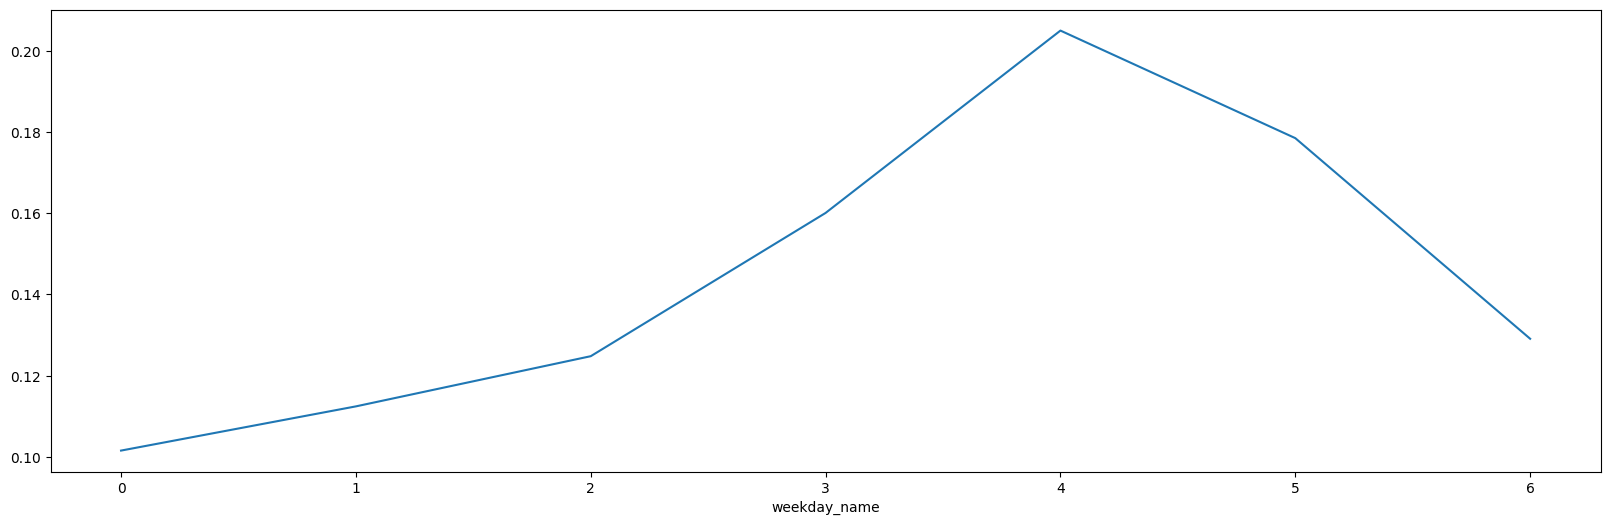

In [69]:
sales_data.sort_values('date',ascending = True).groupby('weekday_name').weekly_perc.mean().plot(figsize=(20,6))

In [57]:
sales_data.head()

,Unnamed: 0,date,category,value,weekday,week,week_total,weekly_perc,weekday_name
49,49,2023-10-30,total_net_sales,8910.70,0,2023-10-30,108821.19,0.081884,<bound method PandasDelegate._add_delegate_acc...
50,50,2023-10-31,total_net_sales,12748.55,1,2023-10-30,108821.19,0.117151,<bound method PandasDelegate._add_delegate_acc...
51,51,2023-11-01,total_net_sales,10247.61,2,2023-10-30,108821.19,0.094169,<bound method PandasDelegate._add_delegate_acc...
52,52,2023-11-02,total_net_sales,16628.70,3,2023-10-30,108821.19,0.152808,<bound method PandasDelegate._add_delegate_acc...
53,53,2023-11-03,total_net_sales,22156.94,4,2023-10-30,108821.19,0.203609,<bound method PandasDelegate._add_delegate_acc...
